In [186]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from math import sqrt
from dateutil import parser

%matplotlib inline

base_url = 'https://raw.githubusercontent.com/aisaacso/SafeBoss/master/'
crime_url = base_url + 'Crime_Incident_Reports.csv'
crime = pd.read_csv(crime_url)
crime['FROMDATE'] = pd.to_datetime(crime.FROMDATE, format = '%m/%d/%Y %I:%M:%S %p')

/Users/annaisaacson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


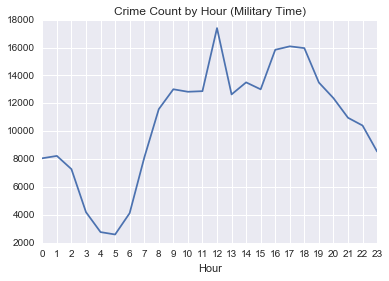

In [222]:
# Analysis of crime time of day

#Confirms no nulls in FROMDATE
#crime_nulls = crime[crime.FROMDATE.isnull()==True]
#crime_nulls

# Remove entries with 00:00:00 as time - I'm not sure this is valid!
#crime_has_time = crime[ (crime.FROMDATE.dt.hour <> 0) & (crime.FROMDATE.dt.minute <> 0)]

# Adds Hour column for each crime
crime['Hour'] = crime.FROMDATE.dt.hour

# Removes the rows that have no time -- probably needlessly complex!
crime_no_time = crime[(crime.FROMDATE.dt.hour == 0) & (crime.FROMDATE.dt.minute == 0)]
crime_no_time['no_time'] = 'indicator'
crime_time = crime.merge(crime_no_time, how='left')
crime_time = crime_time[crime_time.no_time <> 'indicator']

# Pivot table of count conditioned on hour
hours = pd.pivot_table(crime_time, values = 'DAY_WEEK', index = 'Hour', aggfunc = 'count')

#Plots the total number of crimes at each time of day
hours.plot(xticks = crime.Hour.unique(), title='Crime Count by Hour (Military Time)')